In [4]:
import torch

from lucent.optvis import render, param, transform, objectives
from lucent.modelzoo.util import get_model_layers

from pytorchcv.model_provider import get_model as ptcv_get_model

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [6]:
net = ptcv_get_model("resnet20_cifar100", pretrained=True).to(device).eval()

In [16]:
for name, layer in net._modules.items():
    if layer is None:
        # e.g. GoogLeNet's aux1 and aux2 layers
        continue
    print(name)
    if name == "output":
        print(layer._modules.items())
#     features["_".join(prefix + [name])] = ModuleHook(layer)
#     hook_layers(layer, prefix=prefix + [name])

features
output
odict_items([])


In [20]:
from collections import OrderedDict

class ModuleHook:
    def __init__(self, module):
        self.hook = module.register_forward_hook(self.hook_fn)
        self.module = None
        self.features = None

    def hook_fn(self, module, input, output):
        self.module = module
        self.features = output

    def close(self):
        self.hook.remove()


def hook_model(model):
    features = OrderedDict()

    # recursive hooking function
    def hook_layers(net, prefix=[]):
        if hasattr(net, "_modules"):
            for name, layer in net._modules.items():
                if layer is None:
                    # e.g. GoogLeNet's aux1 and aux2 layers
                    continue
                features["_".join(prefix + [name])] = ModuleHook(layer)
                hook_layers(layer, prefix=prefix + [name])

    hook_layers(model)
    return features

In [21]:
features = hook_model(net)

In [34]:
x = torch.zeros((1, 3, 32, 32)).to(device)

In [35]:
print(features['features_final_pool'].features)
print(features['output'].features)

None
None


In [36]:
net(x)

tensor([[ 1.8337, -1.4709,  0.0271, -0.7148,  0.0370, -0.1507, -0.8189,  0.9385,
         -1.3127,  2.3062, -0.3348,  0.1108, -2.6695, -1.7379, -2.5689, -0.4551,
         -0.5948,  0.3206,  0.2367, -1.0861,  0.6118, -0.6678, -1.0085,  4.9016,
          2.0494,  1.6755, -0.9330, -0.1615,  2.1250, -0.2115,  0.6646, -1.1380,
         -1.3570,  0.7690,  0.4404, -2.0272, -0.3456, -1.8814,  0.1945,  0.3686,
          1.2247, -0.6977,  0.1172, -1.1133,  0.6819, -1.5177, -0.7891, -0.3102,
         -1.3217,  0.5244,  0.8520, -1.4418, -0.2840, -0.2401, -0.1120,  0.1728,
         -0.5096,  1.8330, -0.6634,  1.1502,  3.1967, -0.6073, -1.7972, -0.3111,
          1.4349, -0.1158, -0.6247,  0.7515,  0.5632,  2.0421, -1.5322,  3.7166,
          0.4421,  1.5849,  0.6027, -0.8073,  0.5707,  1.1522, -0.7522,  1.1610,
         -0.0530, -0.3253, -0.6447, -0.5906, -0.0414, -0.1075, -2.0050, -0.7657,
         -0.7578, -0.2389, -1.2035,  0.6560, -0.1088, -0.4342,  0.7228,  1.3179,
         -0.4656, -0.2567, -

In [39]:
# print(features['features_final_pool'].features)
print(features['output'].features.shape)

torch.Size([1, 100])


In [40]:
_ = render.render_vis(net, "output:100", show_inline=True)

  0%|                                                                  | 0/512 [00:00<?, ?it/s]


AssertionError: There are no saved feature maps. Make sure to put the model in eval mode, like so: `model.to(device).eval()`. See README for example.

100%|████████████████████████████████████████████████████████| 512/512 [00:11<00:00, 45.01it/s]



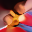

In [76]:
cppn_param_f = lambda: param.cppn(32)
cppn_opt = lambda params: torch.optim.Adam(params, 5e-3)
_ = render.render_vis(net, "labels:11", cppn_param_f, cppn_opt, fixed_image_size=32, show_inline=True)

100%|████████████████████████████████████████████████████████| 512/512 [00:15<00:00, 32.32it/s]



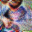
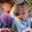
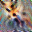
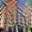
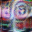
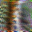
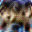
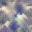

In [77]:
batch_param_f = lambda: param.image(32, batch=8)

obj = objectives.channel("labels", 11) - 4 * objectives.diversity("features_final_pool")

_ = render.render_vis(net, obj, batch_param_f, fixed_image_size=32, show_inline=True)

In [9]:
get_model_layers(net)

['features',
 'features_init_block',
 'features_init_block_conv',
 'features_init_block_bn',
 'features_init_block_activ',
 'features_stage1',
 'features_stage1_unit1',
 'features_stage1_unit1_body',
 'features_stage1_unit1_body_conv1',
 'features_stage1_unit1_body_conv1_conv',
 'features_stage1_unit1_body_conv1_bn',
 'features_stage1_unit1_body_conv1_activ',
 'features_stage1_unit1_body_conv2',
 'features_stage1_unit1_body_conv2_conv',
 'features_stage1_unit1_body_conv2_bn',
 'features_stage1_unit1_activ',
 'features_stage1_unit2',
 'features_stage1_unit2_body',
 'features_stage1_unit2_body_conv1',
 'features_stage1_unit2_body_conv1_conv',
 'features_stage1_unit2_body_conv1_bn',
 'features_stage1_unit2_body_conv1_activ',
 'features_stage1_unit2_body_conv2',
 'features_stage1_unit2_body_conv2_conv',
 'features_stage1_unit2_body_conv2_bn',
 'features_stage1_unit2_activ',
 'features_stage1_unit3',
 'features_stage1_unit3_body',
 'features_stage1_unit3_body_conv1',
 'features_stage1_unit3